In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("abalone.csv")

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

there is no null values

In [6]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [7]:
df.groupby(by='Sex').agg('count')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,,,,,,,,
F,1307,1307,1307,1307,1307,1307,1307,1307
I,1342,1342,1342,1342,1342,1342,1342,1342
M,1528,1528,1528,1528,1528,1528,1528,1528


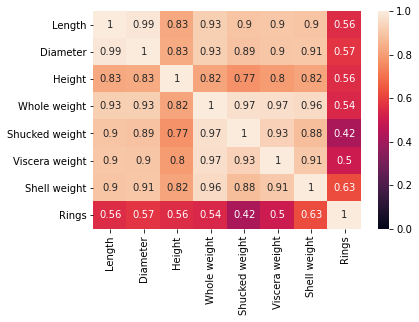

In [8]:
sns.heatmap(df.corr(),annot=True,vmin=0,vmax=1)

In [9]:
cat_df=['Sex']
num_df = []
for i in df:
    if (df[i].dtypes=='int') | (df[i].dtypes=='float') | (df[i].dtypes=='int64'):
        num_df.append(i)
    else: print('Other >', i)
print("Categorical Columns : ",cat_df)
print()
print("Continous Columns : ",num_df)

Other > Sex
Categorical Columns :  ['Sex']

Continous Columns :  ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']


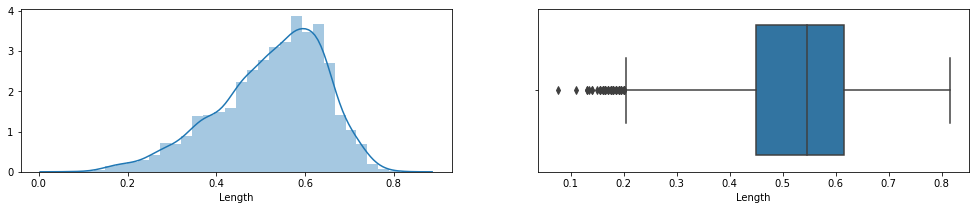

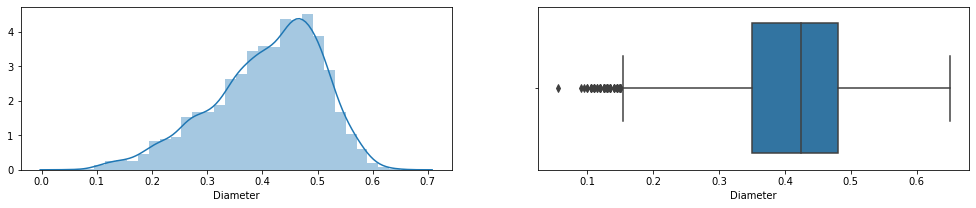

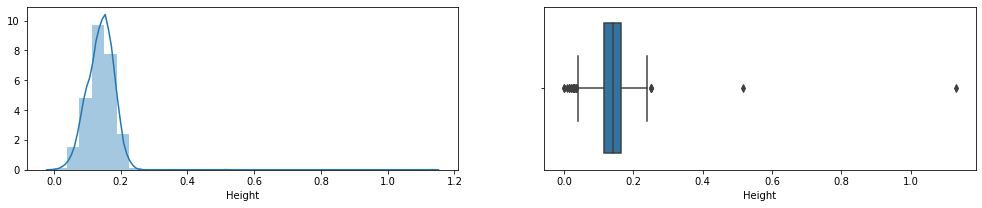

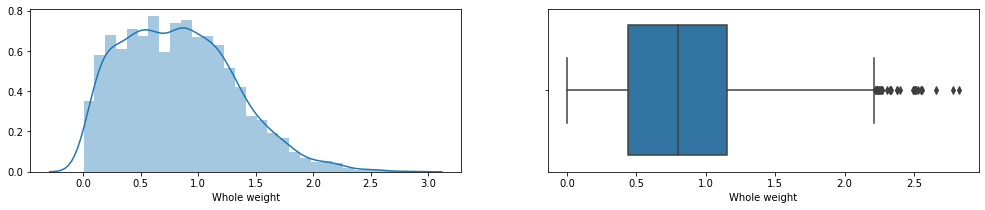

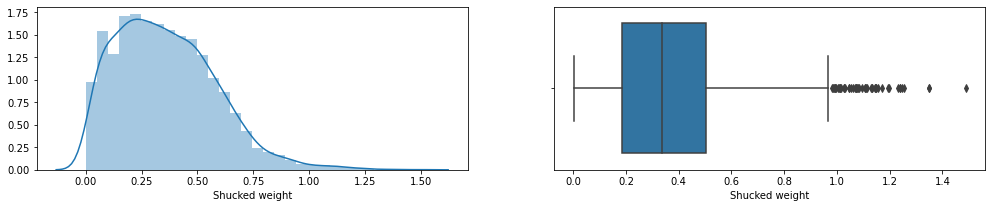

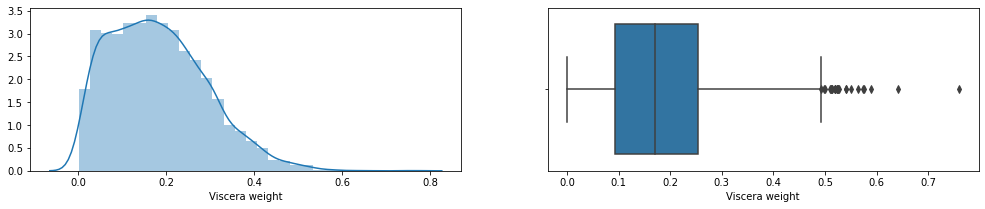

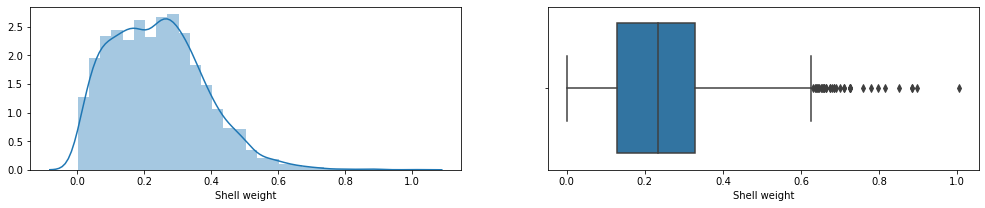

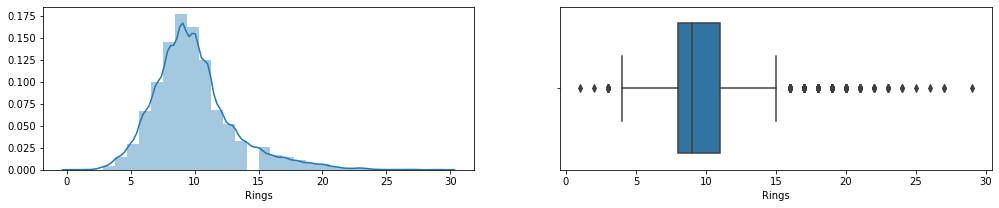

In [10]:
#Univariate analysis for num_df
skewness, skew_name = [], []
for i in num_df:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    skewness.append(round(df[i].skew(),2))
    skew_name.append(i)

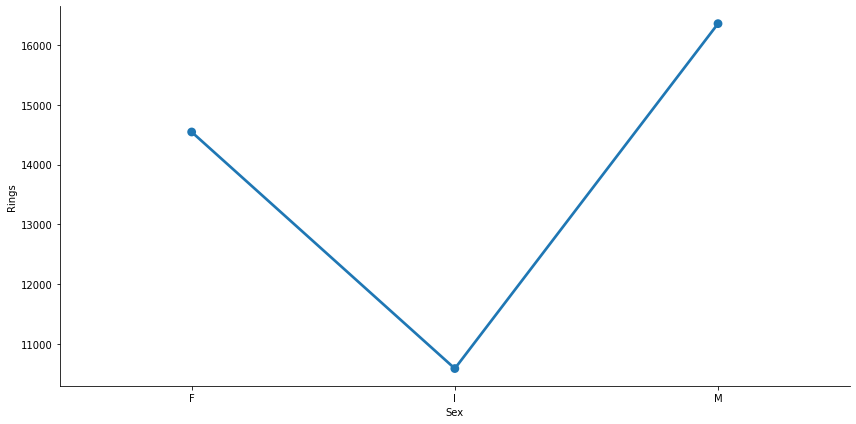

In [11]:

# Bivariate Analysis of all categorical variables with Target Variable.
df_cat = pd.DataFrame(df.groupby(['Sex'], as_index=False).sum())
sns.catplot(x='Sex', y="Rings", data=df_cat.reset_index(), kind="point", height=6, aspect=2)

In [12]:

df['Age'] = df['Rings'] + 1.5

In [13]:
df['Age']

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4177, dtype: float64

In [14]:
df=pd.get_dummies(df,drop_first=True)

In [15]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,1,0


In [16]:
#applying zscore
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df=df_new
df.shape

(4027, 11)

Train and test split

In [21]:
X = df.drop(['Rings','Age','Sex_I','Sex_M'], axis = 1)
y = df['Rings']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log_model=LogisticRegression()

In [26]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_pred=log_model.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score,classification_report

In [32]:
result = accuracy_score(y_test,y_pred)
result

0.2597187758478081

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.23      0.13      0.17        23
           6       0.25      0.20      0.22        70
           7       0.32      0.53      0.40       102
           8       0.31      0.30      0.30       177
           9       0.26      0.50      0.34       202
          10       0.22      0.36      0.27       192
          11       0.23      0.12      0.16       144
          12       0.00      0.00      0.00        91
          13       0.00      0.00      0.00        58
          14       0.00      0.00      0.00        40
          15       0.00      0.00      0.00        32
          16       0.00      0.00      0.00        21
          17       0.00      0.00      0.00        14
          18       0.00      0.00      0.00         7
          19       0.00      0.00      0.00        17

    accuracy              

# SVM

In [34]:
from sklearn.svm import SVC

In [35]:

model= SVC(kernel='rbf',C=1,gamma=100)
model.fit(X_train,y_train)
y_predt=model.predict(X_test)
result_acc = accuracy_score(y_test,y_pred)

In [36]:
result_acc

0.2597187758478081

In [57]:

new_df = df.copy()

In [58]:
new_df['newRings_1'] = np.where(df['Rings'] <= 8,1,0)
new_df['newRings_2'] = np.where(((df['Rings'] > 8) & (df['Rings'] <= 10)), 2,0)
new_df['newRings_3'] = np.where(df['Rings'] > 10,3,0)

In [59]:
new_df['newRings'] = new_df['newRings_1'] + new_df['newRings_2'] + new_df['newRings_3']

In [62]:
X = new_df.drop(['Rings','Age','Sex_I','Sex_M','newRings_1','newRings_2','newRings_3'], axis = 1)
y = new_df['newRings']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
from sklearn import svm
svmModel = svm.SVC(kernel='rbf', C=1, gamma=100) 
svmModel.fit(X_train, y_train)
Y_pred = svmModel.predict(X_test)
result_acc = accuracy_score(y_test,Y_pred)

In [69]:
result_acc

0.9969902182091799